In [1]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('New_final_training_data.csv')
dropping_columns = ['CropCode', 'CropName', 'MarketCode', 'MarketName', 'Upper_Price', 'Middle_Price', 'Lower_Price', 'month', 'year'
                    , 'day']
df = pd.DataFrame(data= df.drop(dropping_columns, axis= 1))

df.head()

,dayoffset,TransDate,Avg_Price,Trans_Quantity,Trans_Quantity_day1,Trans_Quantity_day2,Trans_Quantity_day3,Trans_Quantity_day4,Trans_Quantity_day5,Avg_Price_day1,...,A型蒸發量(mm)_avg,日最高紫外線指數_avg,總雲量(0~10)_avg,地溫0cm_avg,地溫5cm_avg,地溫10cm_avg,地溫20cm_avg,地溫30cm_avg,地溫50cm_avg,地溫100cm_avg
0,548,106.07.01,20.0,1580.0,2560.0,2760.0,1560.0,1460.0,1360.0,20.0,...,-0.886441,7.966667,8.123333,27.620000,28.053333,28.138333,27.873333,27.631667,28.050000,26.773333
1,549,106.07.02,20.0,1850.0,2760.0,1560.0,1460.0,1360.0,1580.0,20.0,...,-0.903390,8.050000,8.061667,27.725000,28.155000,28.241667,27.988333,27.736667,28.146667,26.856667
2,551,106.07.04,20.0,2250.0,1560.0,1460.0,1360.0,1580.0,1850.0,18.0,...,-1.184746,8.216667,8.016667,27.865000,28.308333,28.398333,28.161667,27.916667,28.411667,27.026667
3,552,106.07.05,26.0,1950.0,1460.0,1360.0,1580.0,1850.0,2250.0,18.0,...,-1.067797,8.300000,8.028333,27.923333,28.376667,28.458333,28.225000,27.976667,28.481667,27.111667
4,553,106.07.06,25.0,1660.0,1360.0,1580.0,1850.0,2250.0,1950.0,20.0,...,-0.933898,8.433333,8.003333,28.015000,28.456667,28.533333,28.300000,28.050000,28.550000,27.186667


In [4]:
df.columns

Index(['dayoffset', 'TransDate', 'Avg_Price', 'Trans_Quantity',
       'Trans_Quantity_day1', 'Trans_Quantity_day2', 'Trans_Quantity_day3',
       'Trans_Quantity_day4', 'Trans_Quantity_day5', 'Avg_Price_day1',
       'Avg_Price_day2', 'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5',
       '測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '相對溼度(%)', '最小相對溼度(%)', '風速(m/s)',
       '風向(360degree)', '最大瞬間風(m/s)', '最大瞬間風風向(360degree)', '降水量(mm)',
       '降水時數(hour)', '最大十分鐘降水量(mm)', '最大六十分鐘降水量(mm)', '日照時數(hour)',
       '全天空日射量(MJ/㎡)', '能見度(km)', 'A型蒸發量(mm)', '日最高紫外線指數', '總雲量(0~10)',
       '地溫0cm', '地溫5cm', '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm',
       '測站氣壓(hPa)_avg', '海平面氣壓(hPa)_avg', '測站最高氣壓(hPa)_avg', '測站最低氣壓(hPa)_avg',
       '氣溫(℃)_avg', '3highest_temp_avg', '3lowest_temp_avg', 'TmpHigher22_num',
       'TmpLower13_num', '最高氣溫(℃)_avg', '最低氣溫(℃)_avg', '露點溫度(℃)_avg',
       '相對溼度(%)_avg', '最小相對溼度(%)_avg', '風速(m/

In [5]:
print(df['3highest_RainFall_avg'].unique())

[ 57.   80.3 231.  243.  132.1 110.   82.6  67.6  57.1  53.2  46.4  21.3
  15.   11.2  13.5 107.   44.5  49.8 175.5 170.6 111.5 149.5  46.6  39.6
  55.   51.6  58.   66.5 137.9 107.8  56.1  20.   14.1  41.6 106.4  56.4
  16.5  62.5 106.5 174.5 128.   99.   94.5  69.   34.    8.5  17.5  87.
  63.5 147.   69.5  65.  115.   89.5  36.   46.5  18.5  33.   35.   55.5
  73.5  95.   97.5 127.  121. ]


In [6]:
print(df['3lowest_temp_avg'].unique())

[21.6 21.7 23.4 24.6 24.9 26.2 27.3 27.8 26.5 25.  23.3 21.8 20.4 20.3
 19.3 17.5 17.2 16.3 15.7 15.5 15.4 13.7 12.8 12.1 12.  10.9  9.4 10.3
 13.6 14.3 15.3 17.3 18.  20.2 20.5 21.9 22.1 24.8 25.9 27.1 26.9 24.3
 23.1 22.  21.1 19.9 18.9 17.9 17.  16.5 16.  14.5 14.1 15.9 19.  22.3
 22.7 23.9 25.5 26.4 25.6 25.3 19.7 17.6 16.9 15.8 13.1 12.2 11.7 15.1
 21.  23.7 26.1 26.3 24.4 18.8 15.6  9.9  8.2 10.4 12.5 13.2 16.2 17.4
 22.2 22.6 23.6 20.8 17.1 11.8 12.7 13.5 14.9 16.8 18.3 19.5 22.5 27.2
 27.  24.1 19.6 16.7 16.6]


In [8]:
print(df['TmpHigher22_num'].unique())

[56. 57. 58. 59. 60. 54. 52. 49. 48. 47. 46. 45. 42. 41. 38. 37. 36. 35.
 34. 31. 30. 29. 28. 27. 24. 23. 22. 21. 19. 18. 17. 16. 14. 13. 12.  9.
  8.  7.  4.  3.  0.  5.  6. 10. 20. 26. 33. 39. 40. 43. 44. 50. 51. 53.
 55. 32. 25. 15.  2. 11.  1.]


In [9]:
print(df['TmpLower13_num'].unique())

[ 0.  1.  2.  3.  4.  5.  8.  9. 10. 11.  7.  6.]


In [15]:
string_columns = []
for col in df:
        if(df[col].dtypes=='object'):
            string_columns.append(col)
print(string_columns)

['TransDate', '降水量(mm)', '最大十分鐘降水量(mm)', '最大六十分鐘降水量(mm)', 'A型蒸發量(mm)', '日最高紫外線指數']


In [16]:
non_string_columns = df.select_dtypes(exclude=['object']).columns
print(non_string_columns)
data = df[non_string_columns].copy()
print(data)

Index(['dayoffset', 'Avg_Price', 'Trans_Quantity', 'Trans_Quantity_day1',
       'Trans_Quantity_day2', 'Trans_Quantity_day3', 'Trans_Quantity_day4',
       'Trans_Quantity_day5', 'Avg_Price_day1', 'Avg_Price_day2',
       'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5', '測站氣壓(hPa)',
       '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)', '最高氣溫(℃)',
       '最低氣溫(℃)', '露點溫度(℃)', '相對溼度(%)', '最小相對溼度(%)', '風速(m/s)',
       '風向(360degree)', '最大瞬間風(m/s)', '最大瞬間風風向(360degree)', '降水時數(hour)',
       '日照時數(hour)', '全天空日射量(MJ/㎡)', '能見度(km)', '總雲量(0~10)', '地溫0cm', '地溫5cm',
       '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm', '測站氣壓(hPa)_avg',
       '海平面氣壓(hPa)_avg', '測站最高氣壓(hPa)_avg', '測站最低氣壓(hPa)_avg', '氣溫(℃)_avg',
       '3highest_temp_avg', '3lowest_temp_avg', 'TmpHigher22_num',
       'TmpLower13_num', '最高氣溫(℃)_avg', '最低氣溫(℃)_avg', '露點溫度(℃)_avg',
       '相對溼度(%)_avg', '最小相對溼度(%)_avg', '風速(m/s)_avg', '風向(360degree)_avg',
       '最大瞬間風(m/s)_avg', '最大瞬間風風向(360degree)_avg', '降水量(mm)

# 原始天氣模型

In [37]:
select_columns =['Avg_Price', 'Trans_Quantity','測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '相對溼度(%)', '最小相對溼度(%)', '風速(m/s)',
       '風向(360degree)', '最大瞬間風(m/s)', '最大瞬間風風向(360degree)', '降水時數(hour)',
       '日照時數(hour)', '全天空日射量(MJ/㎡)', '能見度(km)', '總雲量(0~10)', '地溫0cm', '地溫5cm',
       '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm','3highest_temp_avg', '3lowest_temp_avg', 'TmpHigher22_num','3highest_RainFall_avg',
       'TmpLower13_num']

original = df[select_columns].copy()

C:\Users\user\AppData\Local\Temp\ipykernel_18952\2541684935.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')


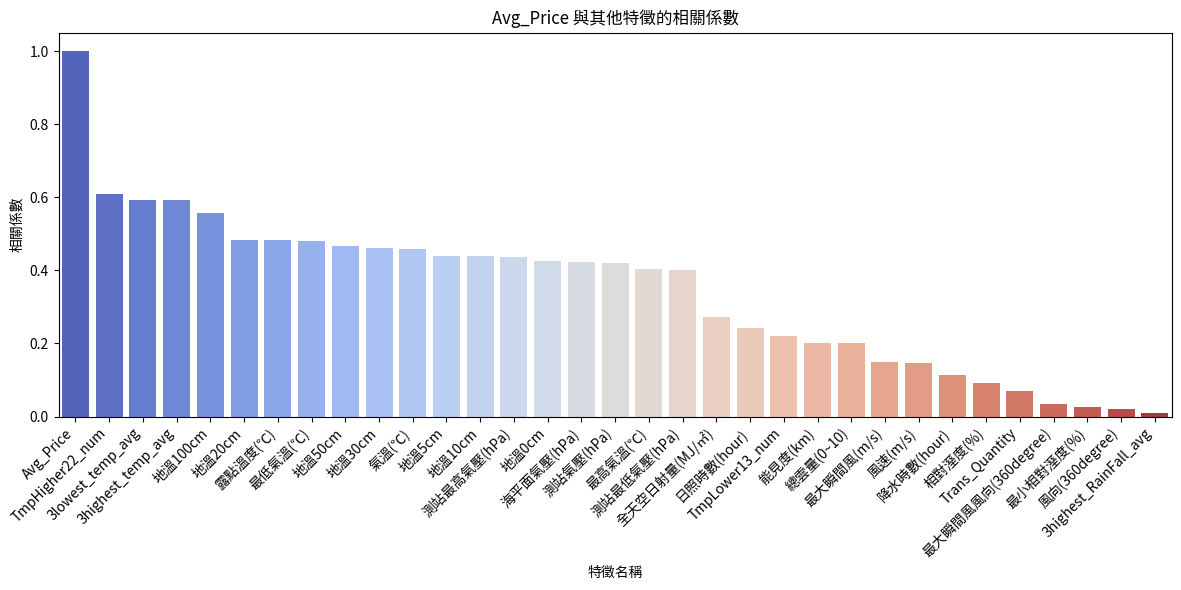

In [39]:
 # 設定中文字型
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 獲取數值型數據列
numeric_df = original.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])

# 計算相關係數
correlations = numeric_df.corr()

# 設定要計算相關係數的目標列名稱
target_column = 'Avg_Price'

# 與目標列的相關係數
target_correlations = correlations[target_column]

# 將相關係數的絕對值存儲為 DataFrame
correlation_df = pd.DataFrame({'相關係數': target_correlations.abs()})

# 按相關係數絕對值的大小進行排序
correlation_df = correlation_df.sort_values(by='相關係數', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')
plt.title(f'{target_column} 與其他特徵的相關係數')
plt.xlabel('特徵名稱')
plt.ylabel('相關係數')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
correlations = original.corrwith(original[target_column])
select_column = correlations[abs(correlations) > 0.3].index
print(select_column)
filter_df = original[select_column].copy()


Index(['Avg_Price', '測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)',
       '氣溫(℃)', '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '地溫0cm', '地溫5cm', '地溫10cm',
       '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm', '3highest_temp_avg',
       '3lowest_temp_avg', 'TmpHigher22_num'],
      dtype='object')


In [53]:
train = filter_df.iloc[131:1039,:]
test = filter_df.iloc[1039:,:]

Mean Squared Error (MSE): 87.33128132728919
Root Mean Squared Error (RMSE): 9.345120722991714
Mean Absolute Error (MAE): 7.472014817724539
R-squared (R2): 0.12429729489459185


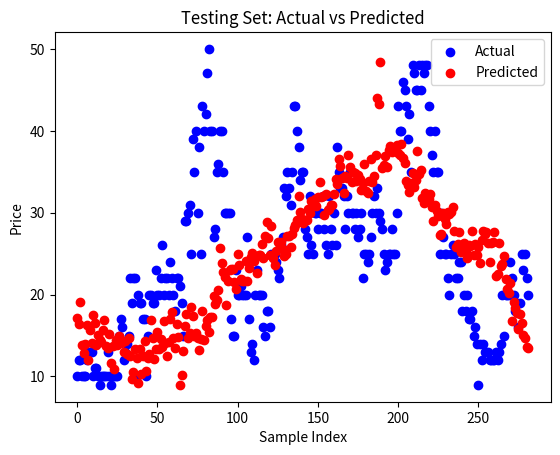

In [54]:
target_column = 'Avg_Price'

X = train.drop(target_column, axis=1)  
y = train[target_column]  

X_test = test.drop(target_column,axis=1)
y_test = test[target_column]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# add 天氣與雨量模型

In [60]:
select_columns =['Avg_Price','測站氣壓(hPa)_avg','海平面氣壓(hPa)_avg', '測站最高氣壓(hPa)_avg', '測站最低氣壓(hPa)_avg', '氣溫(℃)_avg',
       '最高氣溫(℃)_avg', '最低氣溫(℃)_avg', '露點溫度(℃)_avg', '相對溼度(%)_avg',
       '最小相對溼度(%)_avg', '風速(m/s)_avg', '風向(360degree)_avg', '最大瞬間風(m/s)_avg',
       '最大瞬間風風向(360degree)_avg', '降水量(mm)_avg', '降水時數(hour)_avg',
       '最大十分鐘降水量(mm)_avg', '最大六十分鐘降水量(mm)_avg', '日照時數(hour)_avg',
       '全天空日射量(MJ/㎡)_avg', '能見度(km)_avg', 'A型蒸發量(mm)_avg', '日最高紫外線指數_avg',
       '總雲量(0~10)_avg', '地溫0cm_avg', '地溫5cm_avg', '地溫10cm_avg', '地溫20cm_avg',
       '地溫30cm_avg', '地溫50cm_avg', '地溫100cm_avg','3highest_temp_avg', '3lowest_temp_avg', 'TmpHigher22_num','3highest_RainFall_avg',
       'TmpLower13_num']

history_weather = df[select_columns].copy()

C:\Users\user\AppData\Local\Temp\ipykernel_18952\3376660704.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')


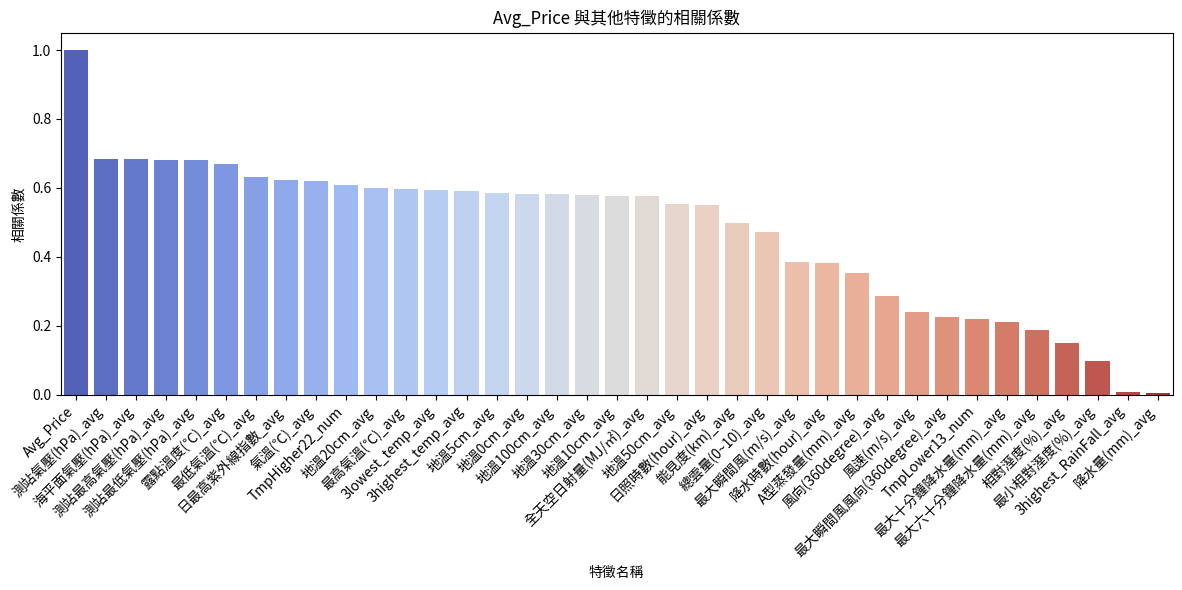

In [63]:
 # 設定中文字型
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 獲取數值型數據列
numeric_df = history_weather.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])

# 計算相關係數
correlations = numeric_df.corr()

# 設定要計算相關係數的目標列名稱
target_column = 'Avg_Price'

# 與目標列的相關係數
target_correlations = correlations[target_column]

# 將相關係數的絕對值存儲為 DataFrame
correlation_df = pd.DataFrame({'相關係數': target_correlations.abs()})

# 按相關係數絕對值的大小進行排序
correlation_df = correlation_df.sort_values(by='相關係數', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')
plt.title(f'{target_column} 與其他特徵的相關係數')
plt.xlabel('特徵名稱')
plt.ylabel('相關係數')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
correlations = original.corrwith(original[target_column])
select_column = correlations[abs(correlations) > 0.3].index
print(select_column)
filter_df = original[select_column].copy()


Index(['Avg_Price', '測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)',
       '氣溫(℃)', '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '地溫0cm', '地溫5cm', '地溫10cm',
       '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm', '3highest_temp_avg',
       '3lowest_temp_avg', 'TmpHigher22_num'],
      dtype='object')


In [64]:
select_columns =['Avg_Price', '測站氣壓(hPa)_avg','露點溫度(℃)_avg', '最大瞬間風(m/s)_avg', '降水時數(hour)_avg', '日照時數(hour)_avg',
       '全天空日射量(MJ/㎡)_avg', '能見度(km)_avg', 'A型蒸發量(mm)_avg', '日最高紫外線指數_avg',
       '總雲量(0~10)_avg', '地溫20cm_avg','3highest_temp_avg',
       '3lowest_temp_avg', 'TmpHigher22_num']

best_corr = df[select_columns].copy()

Mean Squared Error (MSE): 70.93264885543267
Root Mean Squared Error (RMSE): 8.42215226978429
Mean Absolute Error (MAE): 6.606909157218975
R-squared (R2): 0.28873238158267456


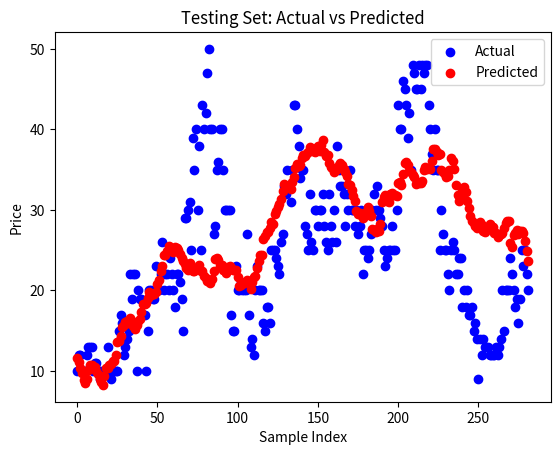

In [65]:
train = best_corr.iloc[131:1039,:]
test = best_corr.iloc[1039:,:]

target_column = 'Avg_Price'

X = train.drop(target_column, axis=1)  
y = train[target_column]  
X_test = test.drop(target_column,axis=1)
y_test = test[target_column]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# final model 

In [78]:
# select_columns =['Avg_Price', '測站氣壓(hPa)_avg','露點溫度(℃)_avg', '降水時數(hour)_avg', '日照時數(hour)_avg',
#        '全天空日射量(MJ/㎡)_avg', '日最高紫外線指數_avg','地溫20cm_avg','Avg_Price_day5','3highest_temp_avg',
#        '3lowest_temp_avg', 'TmpHigher22_num']
select_columns =['Avg_Price', '測站氣壓(hPa)_avg','露點溫度(℃)_avg', '降水時數(hour)_avg', '日照時數(hour)_avg',
       '全天空日射量(MJ/㎡)_avg', '日最高紫外線指數_avg','地溫20cm_avg','Avg_Price_day5','3highest_temp_avg',
       '3lowest_temp_avg', 'TmpHigher22_num']

best_df = df[select_columns].copy()

Mean Squared Error (MSE): 16.303910868374388
Root Mean Squared Error (RMSE): 4.0378101575451
Mean Absolute Error (MAE): 2.8668512794854224
R-squared (R2): 0.8365147214807721


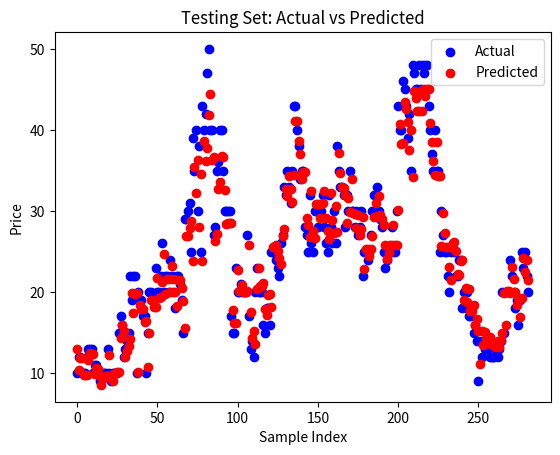

In [79]:
train = best_df.iloc[131:1039,:]
test = best_df.iloc[1039:,:]

target_column = 'Avg_Price'

X = train.drop(target_column, axis=1)  
y = train[target_column]  
X_test = test.drop(target_column,axis=1)
y_test = test[target_column]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()